<a href="https://colab.research.google.com/github/PatrickRuan/2nd-PyCrawlerMarathon/blob/master/Day003_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python 下載XML檔案與解析


* 了解 xml 檔案格式與內容
* 能夠利用套件存取 xml 格式的檔案


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

path = 'drive/My Drive/學習/pycrawler-2/Day03/Day003/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## 存取 XML 的三種套件

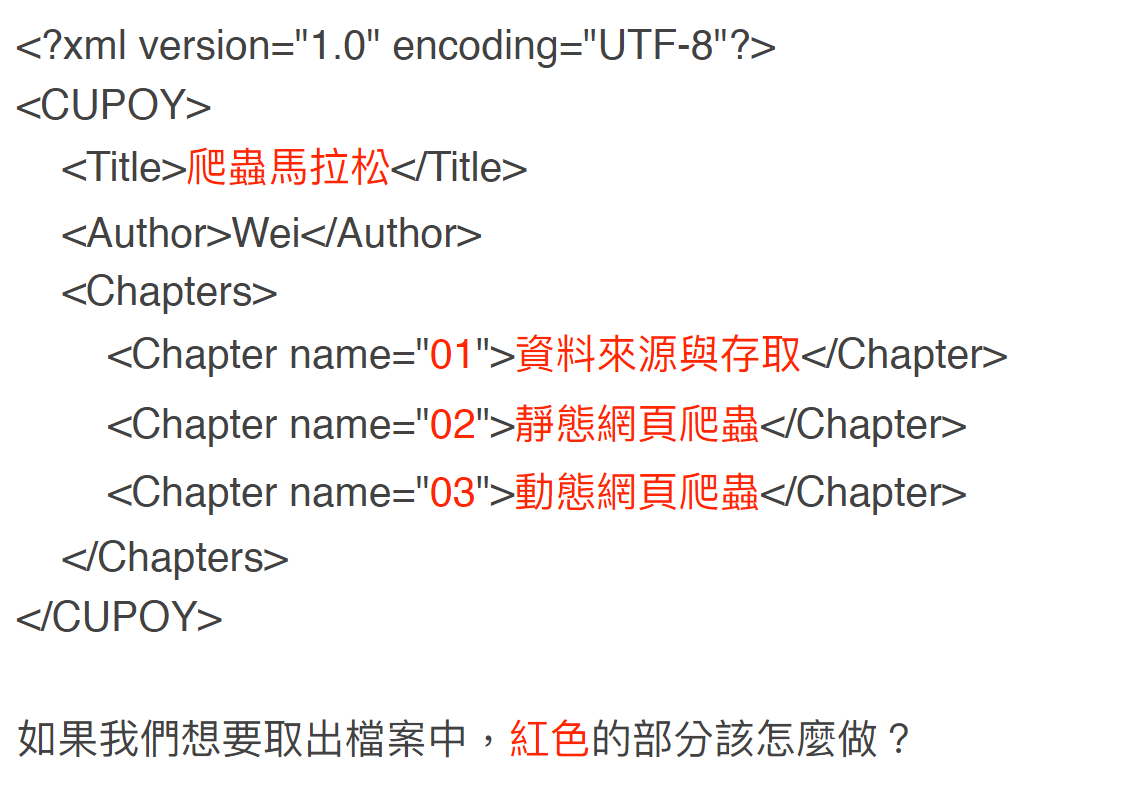

In [2]:
import xml.dom.minidom

# 存取檔案
doc = xml.dom.minidom.parse(path+"sample.xml")

# 存取我們的資訊
print(doc.getElementsByTagName("Title")[0].firstChild.nodeValue)

# 用迴圈存取我們的資訊
chapters = doc.getElementsByTagName("Chapter")
for chapter in chapters:
    print (chapter.getAttribute('name'), chapter.firstChild.nodeValue)

爬蟲馬拉松
01 資料來源與存取
02 靜態網頁爬蟲
03 動態網頁爬蟲


In [3]:
import xml.etree.ElementTree as ET 

# 存取檔案
tree = ET.parse(path+"sample.xml") 
root = tree.getroot()

# 存取我們的資訊
print(root[0].text)

# 用迴圈存取我們的資訊
chapters = root[2]
for chapter in chapters:
    print (chapter.attrib['name'], chapter.text)

爬蟲馬拉松
01 資料來源與存取
02 靜態網頁爬蟲
03 動態網頁爬蟲


In [0]:
chapters = root[1]
for chapter in chapters:
    print (chapter.attrib['name'], chapter.text)

In [5]:
!pip install xmltodict
import xmltodict

# 存取檔案

with open(path+"sample.xml") as fd:
    doc = dict(xmltodict.parse(fd.read()))

# 存取我們的資訊
print(doc['CUPOY']['Title'])

# 用迴圈存取我們的資訊
chapters = doc['CUPOY']['Chapters']['Chapter']
for chapter in chapters:
    print (chapter['@name'], chapter['#text'])

爬蟲馬拉松
01 資料來源與存取
02 靜態網頁爬蟲
03 動態網頁爬蟲


## 下載檔案

In [0]:
# 下載檔案
import urllib.request
import zipfile
!mkdir data
res = "http://opendata.cwb.gov.tw/govdownload?dataid=F-D0047-093&authorizationkey=rdec-key-123-45678-011121314"
urllib.request.urlretrieve(res, "./data/example.zip")
f = zipfile.ZipFile('./data/example.zip')
f.extractall('./data')


In [0]:
import os, sys

# 打开文件
dirs = os.listdir( './data' )

# 输出所有文件和文件夹
for file in dirs:
    print(file)

## File I/O


In [0]:
# 讀檔案
fh = open("./data/64_72hr_CH.xml", "r")
xml = fh.read()
fh.close()

print(xml)
# ['cwbopendata']['dataset']['locations']['location']

## xmltodict 解析檔案內容


In [0]:
# 解析檔案內容
import xmltodict
d = dict(xmltodict.parse(xml))

In [10]:
# 取出 datasetDescription
datasetDescription = d['cwbopendata']['dataset']['datasetInfo']['datasetDescription']
print(datasetDescription)


臺灣各縣市鄉鎮未來3天(72小時)逐3小時天氣預報


## 作業目標

* 比較一下範例檔案中的「File I/O」與「xmltodict」讀出來的內容有什麼差異

* 根據範例檔案的結果：
    1. 請問高雄市有多少地區有溫度資料？
    2. 請取出每一個地區所記錄的第一個時間點跟溫度
    3. 請取出第一個地區所記錄的每一個時間點跟溫度